## 数据集：2021微信大数据挑战赛数据集

### 1. 下载地址
百度网盘下载地址：https://pan.baidu.com/s/11c7kVtCURTEkbe9jrniQ9A 提取码：show

> 数据出处：
GitHub项目地址：https://github.com/ShowMeAI-Hub/multi-task-learning
文章链接：https://www.showmeai.tech/article-detail/60

### 2. 微信视频号推荐数据说明
数据集提供的是访问过微信视频号“热门推荐”的部分用户，在视频号内历史n天的行为数据（脱敏）。数据集包含训练集和测试集，训练集用于训练模型，测试集用于评估模型效果，提交结果demo文件用于展示提交结果的格式。所有数据文件格式都是带表头的.csv格式，不同字段列之间用英文逗号分隔。包括以下文件：
1. user_action.csv: 用户行为表
2. feed_info.csv: Feed信息表
3. feed_embeddings.csv: Feed向量表
4. test_a.csv: A榜测试集
5. submit_demo_初赛a.csv: A榜提交结果demo

#### 训练集

**（1） Feed信息表**:feed_info.csv & feed_embeddings.csv

该数据包含了视频（简称为feed）的基本信息和文本、音频、视频等多模态特征。具体字段如下：

| 字段名               | 类型   | 说明                                                 | 备注             |
| -------------------- | ------ | ---------------------------------------------------- | ---------------- |
| feedid               | String | Feed视频ID                                           | 已脱敏           |
| authorid             | String | 视频号作者ID                                         | 已脱敏           |
| videoplayseconds     | Int    | Feed时长                                             | 单位：秒         |
| description          | String | Feed配文，以词为单位使用空格分隔                     | 已脱敏；存在空值 |
| ocr                  | String | 图像识别信息，以词为单位使用空格分隔                 | 已脱敏；存在空值 |
| asr                  | String | 语音识别信息，以词为单位使用空格分隔                 | 已脱敏；存在空值 |
| description_char     | String | Feed配文，以字为单位使用空格分隔                     | 已脱敏；存在空值 |
| ocr_char             | String | 图像识别信息，以字为单位使用空格分隔                 | 已脱敏；存在空值 |
| asr_char             | String | 语音识别信息，以字为单位使用空格分隔                 | 已脱敏；存在空值 |
| bgm_song_id          | Int    | 背景音乐ID                                           | 已脱敏；存在空值 |
| bgm_singer_id        | Int    | 背景音乐歌手ID                                       | 已脱敏；存在空值 |
| manual_keyword_list  | String | 人工标注的关键词，多个关键词使用英文分号”;”分隔      | 已脱敏；存在空值 |
| machine_keyword_list | String | 机器标注的关键词，多个关键词使用英文分号”;”分隔      | 已脱敏；存在空值 |
| manual_tag_list      | String | 人工标注的分类标签，多个标签使用英文分号”;”分隔      | 已脱敏；存在空值 |
| machine_tag_list     | String | 机器标注的分类标签，多个标签使用英文分号”;”分隔      | 已脱敏；存在空值 |
| feed_embedding       | String | 融合了ocr、asr、图像、文字的多模态的内容理解特征向量 | 512维向量        |

_说明_

- 训练集和测试集涉及的feed均在此表中；
- description, orc, asr三个字段为原始文本数据以词为单位使用空格分隔和脱敏处理后得到的。例如：文本“我参加了中国高校计算机大赛“经过处理后得到类似“2 32 100 25 12 89 27”的形式（此处只是一个样例，不代表实际脱敏结果）。此外，我们还提供了以字为单位使用空格分隔和脱敏的结果，对应的字段分别为description_char、ocr_char、asr_char。
- machine_tag_list字段比manual_tag_list字段增加了每个标签对应的预测概率值（取值区间[0,1]）。脱敏后的标签和概率值之间用空格分隔。例如：“1025 0.32657512;2034 0.87653981;35 0.47265462”。
- manual_keyword_list和machine_keyword_list共享相同的脱敏映射表。如果原先两个字段都包含同个关键词，那么脱敏后两个字段都会包含同个id。
- manual_tag_list和machine_tag_list共享相同的脱敏映射表。如果原先两个字段都包含同个分类标签，那么脱敏后两个字段都会包含同个id。
- feed_embedding字段为String格式，包含512维，数值之间用空格分隔。

**（2） 用户行为表**: user_action.csv

该数据包含了用户在视频号内一段时间内的历史行为数据（包括停留时长、播放时长和各项互动数据）。具体字段如下：

| 字段名       | 类型         | 说明         | 备注                                                 |
| ------------ | ------------ | ------------ | ---------------------------------------------------- |
| userid       | String       | 用户ID       | 已脱敏                                               |
| feedid       | String       | Feed视频ID   | 已脱敏                                               |
| device       | Int          | 设备类型ID   | 已脱敏                                               |
| date_        | Int          | 日期         | 已脱敏为1-n，n代表第n天                              |
| play         | Int          | 视频播放时长 | 单位：毫秒；若播放时长大于视频时长，则属于重播的情况 |
| stay         | Int          | 用户停留时长 | 单位：毫秒                                           |
| read_comment | Bool         | 是否查看评论 | 取值{0, 1}，0代表“否”，1代表“是”                     |
| like         | Bool         |  是否点赞     | 取值{0, 1}，0代表“否”，1代表“是”                     |
| click_avatar | Bool         |  是否点击头像 | 取值{0, 1}，0代表“否”，1代表“是”                     |
| favorite     | Bool         |  是否收藏     | 取值{0, 1}，0代表“否”，1代表“是”                     |
| forward      | Bool         |  是否转发     | 取值{0, 1}，0代表“否”，1代表“是”                     |
| comment      | Bool         |  是否发表评论 | 取值{0, 1}，0代表“否”，1代表“是”                     |
| follow       | Bool         |  是否关注     | 取值{0, 1}，0代表“否”，1代表“是”                     |

_说明_

- 用户行为表中每个用户对应的数据已按照时间戳顺序由小到大排列，数据中不提供时间戳字段。

#### 测试集 : test_a.csv

测试集具体字段如下：

| 字段名 | 类型   | 说明       | 备注   |
| ------ | ------ | ---------- | ------ |
| userid | String | 用户ID     | 已脱敏 |
| feedid | String | Feed视频ID | 已脱敏 |
| device | Int    | 设备类型ID | 已脱敏 |

#### 结果格式 : submit_demo_初赛a.csv

- 初赛阶段：需要对测试集中每一行的userid和feedid的四种互动行为的发生概率进行预测，这四种行为包括：查看评论、点赞、点击头像、转发；
- 复赛阶段：需要对测试集中每一行的userid和feedid的七种互动行为的发生概率进行预测，这七种行为包括：查看评论、点赞、点击头像、转发、收藏、评论和关注。

行为具体格式说明如下：

| 字段名       | 类型   | 说明         | 赛段                                                         | 备注   |
| ------------ | ------ | ------------ | ------------------------------------------------------------ | ------ |
| userid       | String | 用户ID       | 初赛/复赛                                                    | 已脱敏 |
| feedid       | String | Feed视频ID   | 已脱敏                                                       |        |
| read_comment | Float  | 是否查看评论 | 预测用户特定行为发生的概率，取值区间[0,1]。 0代表“否”，1代表“是”； 结果最多保留六位小数。 |        |
| like         | Float  | 是否点赞     |                                                              |        |
| click_avatar | Float  | 是否点击头像 |                                                              |        |
| forward      | Float  | 是否转发     |                                                              |        |
| favorite     | Float  | 是否收藏     | 仅复赛                                                       |        |
| comment      | Float  | 是否发表评论 |                                                              |        |
| follow       | Float  | 是否关注     |                                                              |        |


#### 比赛评估标准

采用uAUC作为单个行为预测结果的评估指标，uAUC定义为不同用户下AUC的平均值，计算公式如下：
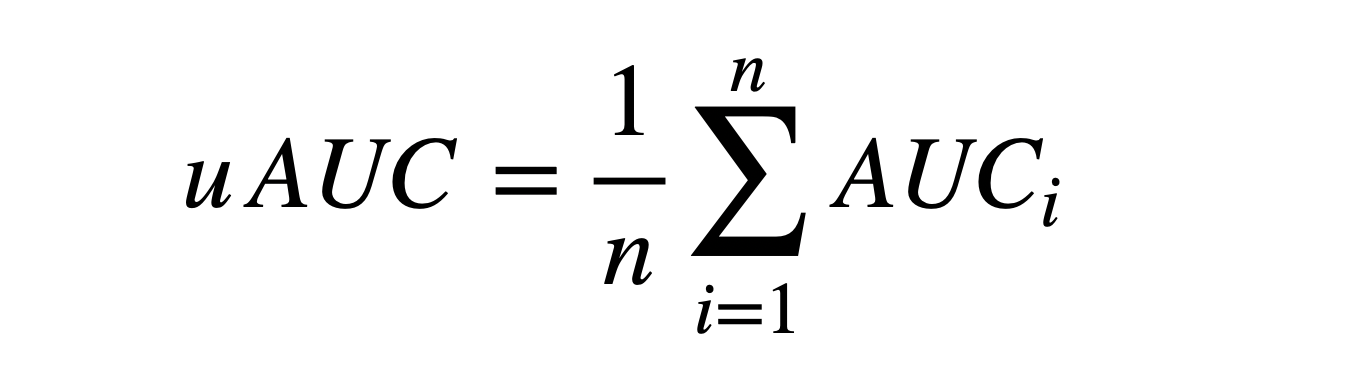

其中，n为测试集中的有效用户数，有效用户指的是对于某个待预测的行为，过滤掉测试集中全是正样本或全是负样本的用户后剩下的用户。AUCi为第i个有效用户的预测结果的AUC（Area Under Curve）。

初赛的最终分数为4个行为（查看评论、点赞、点击头像、转发）的uAUC值的加权平均。复赛的最终分数为7个行为（查看评论、点赞、点击头像、转发、收藏、评论和关注）的uAUC值的加权平均。分数越高，排名越靠前。

在总分中，7个行为的权重如下：

| 字段名       | 字段说明     | 权重 |
| ------------ | ------------ | ---- |
| read_comment | 是否查看评论 | 4    |
| like         | 是否点赞     | 3    |
| click_avatar | 是否点击头像 | 2    |
| forward      | 是否转发     | 1    |
| favorite     | 是否收藏     | 1    |
| comment      | 是否发表评论 | 1    |
| follow       | 是否关注     | 1    |

加权uAUC的计算公式如下:

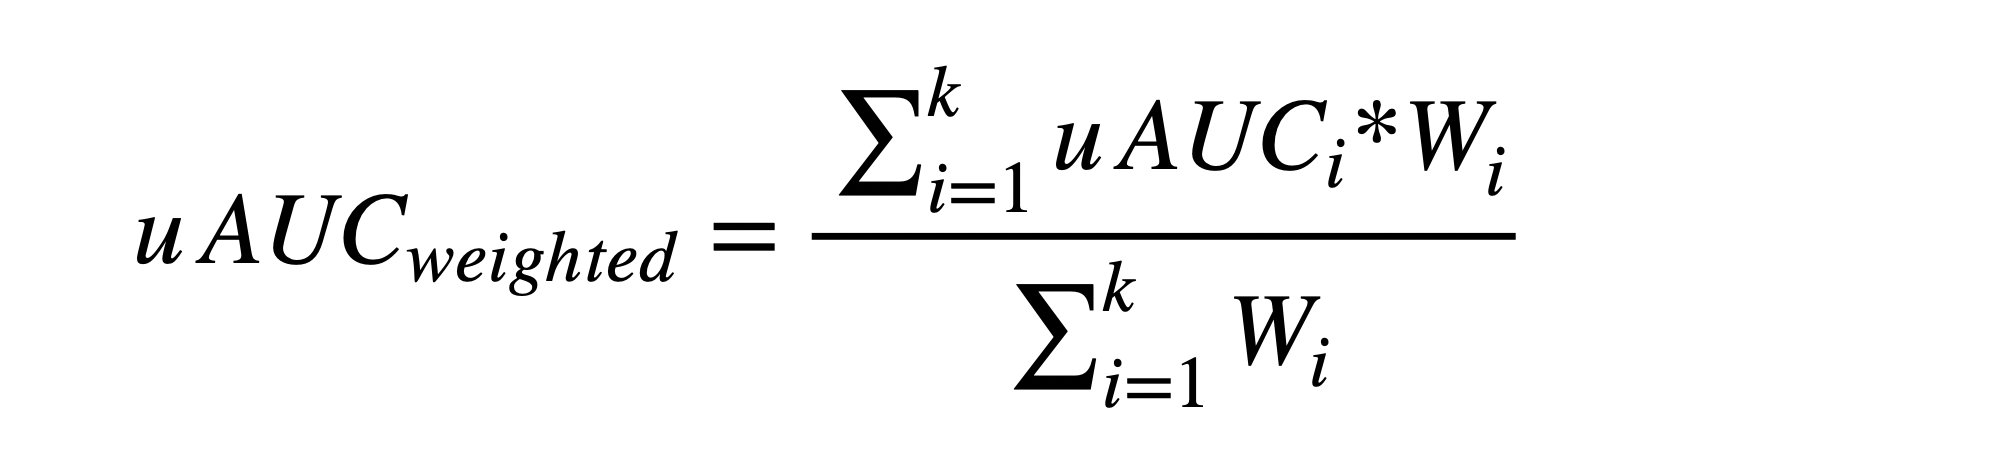!
其中，k为待预测的互动行为数，初赛k=4，复赛k=7。 uAUCi为第i个行为的uAUC值， Wi为第i个行为的权重。


### 数据处理

In [1]:
import os
import numpy as np
import pandas as pd


# 全局参数定义
rawdata_dir =  "../../data/wechat_algo_data"
output_dir = "../../data/wechat_algo_data/middle_data_and_feature"
os.makedirs(output_dir, exist_ok=True)



feedinfo_path = os.path.join(rawdata_dir, "feed_info.csv")
feedemb_path = os.path.join(rawdata_dir, "feed_embeddings.csv")
useraction_path = os.path.join(rawdata_dir, "user_action.csv")
predict_path = os.path.join(rawdata_dir, "test_a.csv")

train_output_path = os.path.join(output_dir, "train.txt")
val_output_path = os.path.join(output_dir, "val.txt")
test_output_path = os.path.join(output_dir, "test.txt")
encoder_output_path = os.path.join(output_dir, "encoder.txt")


In [2]:
# 数据读取
feedinfo_df = pd.read_csv(feedinfo_path)
useraction_df = pd.read_csv(useraction_path)
predict_df = pd.read_csv(predict_path)

print("+ feedinfo_df", feedinfo_df.shape, '\n',feedinfo_df.head(3))
print("+ useraction_df", useraction_df.shape, '\n', useraction_df.head(3))
print("+ predict_df", predict_df.shape, '\n', predict_df.head(3))

+ feedinfo_df (106444, 15) 
    feedid  authorid  videoplayseconds  \
0   43549      6165                38   
1   77432      9386                60   
2   12921      2996                15   

                                         description  \
0  104741 122649 8109 117252 65632 23463 118668 4...   
1  35753 27736 146603 73055 11794 101761 11794 81...   
2  114413 107973 117252 27736 41035 32715 125374 ...   

                                                 ocr  \
0  139499 59421 82007 142955 27736 83577 52394 11...   
1  35753 146603 73055 11794 101761 67496 16933 52...   
2                                                NaN   

                                                 asr  bgm_song_id  \
0  142955 27736 83577 103956 32010 34170 89740 90...      19356.0   
1  146739 14368 79290 79213 47366 8109 33194 1198...          NaN   
2                                                NaN      10288.0   

   bgm_singer_id manual_keyword_list        machine_keyword_list  \
0        11

#### 数据合并与预处理

In [3]:
import os
import copy
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

def split(column,delimiter=';'):
    '''
    对list字段进行切分和映射编码
    '''
    if not isinstance(column, str):
        return []
    keys = column.strip().split(delimiter)
    for key in keys:
        if key not in key2index:
            key2index[key] = len(key2index) +1
    return list(map(lambda x: key2index[x], keys))

def preprocess(sample, dense_features):
    '''
    特征处理： 对数值型特征做对数变换，对id类特征+1； 补充缺失值。
    '''
    sample[dense_features] = sample[dense_features].fillna(0.0)
    sample[dense_features] = np.log(sample[dense_features] + 1.0)
    
    sample[["authorid", "bgm_song_id", "bgm_singer_id"]] += 1  # 0 用于填未知
    sample[["authorid", "bgm_song_id", "bgm_singer_id", "videoplayseconds"]] = sample[["authorid", "bgm_song_id", "bgm_singer_id", "videoplayseconds"]].fillna(0)
    sample["videoplayseconds"] = np.log(sample["videoplayseconds"] + 1.0)
    sample[["authorid", "bgm_song_id", "bgm_singer_id"]] = sample[["authorid", "bgm_song_id", "bgm_singer_id"]].astype(int)
    return sample

In [4]:
# 合并数据


# 标签列
target = ["read_comment", "like", "click_avatar", "forward"]
# 稀疏特征
sparse_features = ['userid', 'feedid', 'authorid', 'bgm_song_id', 'bgm_singer_id']
# 变长序列特征
varlen_features = ['manual_tag_list','manual_keyword_list']
# 稠密特征
dense_features = ['videoplayseconds']

# 数据合并
predict_df['date_'] = 15
useraction_df = pd.concat([useraction_df,predict_df])
feedinfo_df = feedinfo_df[['feedid', 'authorid', 'videoplayseconds', 'bgm_song_id', 'bgm_singer_id','manual_tag_list','manual_keyword_list']]
data = useraction_df.merge(feedinfo_df, how='left',on='feedid') #行为数据拼接，作者id，bgm_song_id 
data = preprocess(data,dense_features) #特征处理
data = data[dense_features+sparse_features+varlen_features+['date_']+target]

# 变长特征处理
encoder = {}
global key2index
for f in varlen_features:
    key2index = {}
    f_list = list(map(split, data[f].values))
    f_length = np.array(list(map(len, f_list)))
    max_len = max(f_length)
    print(f'{f}字段最长的取值序列长度为{max_len}')
    data[f] = list(pad_sequences(f_list, maxlen=max_len, padding='post',))
    encoder[f] = copy.copy(key2index)

manual_tag_list字段最长的取值序列长度为11
manual_keyword_list字段最长的取值序列长度为18


In [5]:
# 稀疏特征编码
for featid in sparse_features:
    print(f"编码ID字段：{featid}")
    encoder[featid] = {uid:ucode+1 for ucode, uid in enumerate(data[featid].unique())}
    data[featid] = data[featid].apply(lambda x:encoder[featid].get(x,0))

编码ID字段：userid
编码ID字段：feedid
编码ID字段：authorid
编码ID字段：bgm_song_id
编码ID字段：bgm_singer_id


In [6]:
print('数据维度：', data.shape)
print('数据字段：', data.columns.tolist())
print('不同的date_取值: ', data['date_'].unique())
# 如果资源比较少，可以在这里进行数据采样
data = data.sample(frac = 1.0)

数据维度： (7739867, 13)
数据字段： ['videoplayseconds', 'userid', 'feedid', 'authorid', 'bgm_song_id', 'bgm_singer_id', 'manual_tag_list', 'manual_keyword_list', 'date_', 'read_comment', 'like', 'click_avatar', 'forward']
不同的date_取值:  [ 1  2  3  5  6  7  8 10 11 12 13 14  4  9 15]


In [7]:
# 构建训练集，验证集和测试集
# 第14天样本作为验证集
train = data[data['date_'] < 14].drop(['date_'],axis = 1)
val = data[data['date_'] == 14].drop(['date_'],axis = 1)  
test = data[data['date_'] == 15].drop(['date_'],axis = 1)

In [8]:
import gc
import joblib
del useraction_df
del feedinfo_df
del data
gc.collect()

0

In [9]:
joblib.dump(train, train_output_path)
joblib.dump(val, val_output_path)
joblib.dump(test, test_output_path)
joblib.dump(encoder, encoder_output_path)

['../../data/wechat_algo_data/middle_data_and_feature/encoder.txt']